In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats as stats
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.stats import power

## 1. 카이제곱 검정

### Q1) 카이제곱 재현
- 정규분포의 1,2,3,개의 합의 분포와 카이제곱 분포가 동일하다는 점을 보여봅시다.
- `z1`,`z2`,`z3` 변수에 각각 정규분포 샘플을 생성해주세요
    - 정규 분포 자료 생성 함수는 `scipy.stats.norm.rvs` 입니다.
- 카이제곱 분포 생성 함수는 `scipy.stats.chi2.pdf` 입니다.


In [ ]:
#샘플 수 설정
n_samples = 10000

# Generate standard normal distributions

z1 = stats.norm.rvs(loc = 0, scale = 1, size = n_samples)
z2 = stats.norm.rvs(loc = 0, scale = 1, size = n_samples)
z3 = stats.norm.rvs(loc = 0, scale = 1, size = n_samples)

chi2_1 = z1**2
chi2_2 = z1**2 + z2**2
chi2_3 = z1**2 + z2**2 + z3**2
print(chi2_3[:10])

[ 0.60816831  2.71273885  4.63817018  4.85062909  2.30214526  0.70353169
 22.43158089  2.69076002  0.45245993  1.63065855]


(array([4.834e+03, 3.049e+03, 1.313e+03, 5.180e+02, 1.870e+02, 6.800e+01,
        2.500e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([4.10115322e-03, 2.24684913e+00, 4.48959710e+00, 6.73234508e+00,
        8.97509305e+00, 1.12178410e+01, 1.34605890e+01, 1.57033370e+01,
        1.79460849e+01, 2.01888329e+01, 2.24315809e+01]),
 <BarContainer object of 10 artists>)

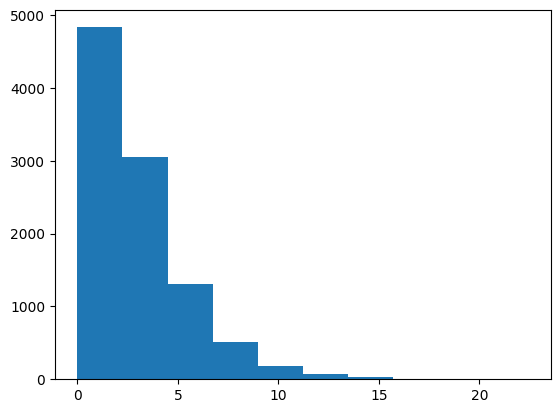

In [ ]:
plt.hist(chi2_3)

[0.52000592 2.48092577 4.18317334 0.50256057 0.68662004]


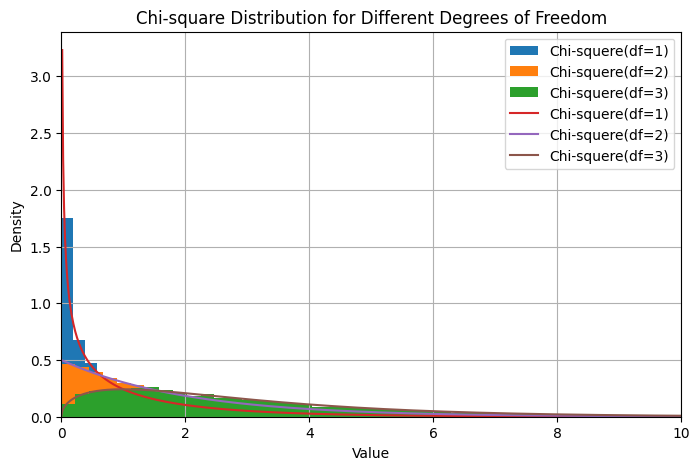

In [ ]:
chi2_1 = z1**2
chi2_2 = z1**2 + z2**2
chi2_3 = z1**2 + z2**2 + z3**2
print(chi2_1[:5])

# 그래프 크기와 x축 결정
plt.figure(figsize=(8, 5))
x = np.linspace(0, 15, 1000)
plt.xlim(0,10)

# 정규분포의 제곱의 표기 히스토그램
plt.hist(chi2_1, bins = 100, density = True, label = 'Chi-squere(df=1)')
plt.hist(chi2_2, bins = 100, density = True, label = 'Chi-squere(df=2)')
plt.hist(chi2_3, bins = 100, density = True, label = 'Chi-squere(df=3)')

# 카이제곱 분포그리기
plt.plot(x, stats.chi2.pdf(x,df=1), label = 'Chi-squere(df=1)')
plt.plot(x, stats.chi2.pdf(x,df=2), label = 'Chi-squere(df=2)')
plt.plot(x, stats.chi2.pdf(x,df=3), label = 'Chi-squere(df=3)' )

# Labels and legend
plt.title('Chi-square Distribution for Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

[0.48964396 1.67971697 0.1323435  5.03076973 0.29572494]


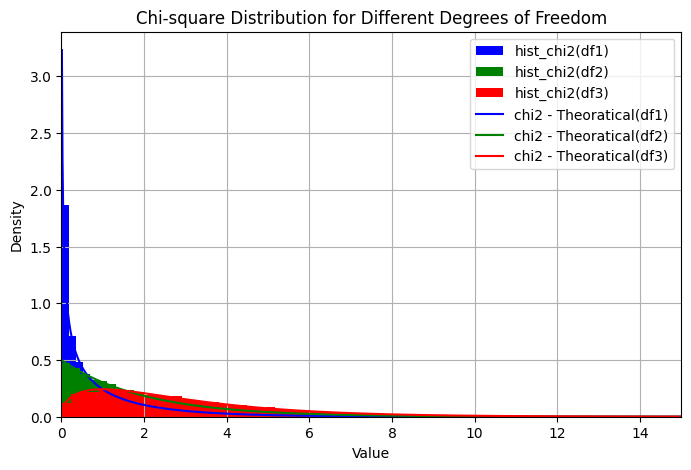

In [ ]:
#샘플 수 설정
n_samples = 10000

# Generate standard normal distributions

"""
코드작성
"""

# print(z1[:5])

chi2_1 = z1**2
chi2_2 = z1**2 + z2**2
chi2_3 = z1**2 + z2**2 + z3**2
print(chi2_1[:5])

# 그래프 크기와 x축 결정
plt.figure(figsize=(8, 5))
x = np.linspace(0, 15, 1000)
plt.xlim(0,15)

# 정규분포의 제곱의 표기 히스토그램
"""
코드작성
"""

# 카이제곱 분포그리기
"""
코드작성
"""

# Labels and legend
plt.title('Chi-square Distribution for Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### 1-1 적합도 검정

In [ ]:
import numpy as np

# 주장하는 방문 비율(%)을 기반으로 기대값을 계산
expected_ratios = np.array([10, 10, 15, 20, 30, 15])


# 관찰된 방문 수
observed_counts = np.array([30, 14, 34, 45, 57, 20])
total_visits = np.sum(observed_counts)
expected_counts = (expected_ratios/100) * total_visits
print(expected_counts)

[20. 20. 30. 40. 60. 30.]


In [ ]:
from scipy.stats import *
# 카이제곱 적합도 검정을 수행

chi2_stat, p_val = stats.chisquare(f_obs =observed_counts, f_exp = expected_counts)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}") # 11.442
print(f"P-value: {p_val:.3f}") # 0.043

# 결론 도출
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 관찰된 방문 비율은 주장하는 비율과 다르다.")
else:
    print("귀무가설 채택: 관찰된 방문 비율은 주장하는 비율과 같다.")

Chi-squared Statistic: 11.442
P-value: 0.043
귀무가설 기각: 관찰된 방문 비율은 주장하는 비율과 다르다.


<ipython-input-4-948602b93ce4>:4: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  chi2_stat, p_val = stats.chisquare(f_obs =observed_counts, f_exp = expected_counts)


### 1-2 독립성 검정

In [ ]:
from scipy.stats import chi2_contingency
# 관찰된 데이터: 성별과 흡연 여부에 따른 빈도수
data = np.array([
    [40, 60],  # 남성: 흡연자, 비흡연자
    [30, 70]   # 여성: 흡연자, 비흡연자
])

# 카이제곱 통계량, p-value, 자유도, 기대값을 계산

chi2_stat, p_val, dof, expected = chi2_contingency(data, correction = True)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}") #1.780
print(f"P-value: {p_val:.3f}") #0.182
print(f"Degrees of Freedom: {dof:.3f}") #1.000
print("Expected frequencies:")
print(expected)
'''
[[35. 65.]
 [35. 65.]]
 '''

# 결론
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 성별과 흡연 여부는 독립적이지 않다.")
else:
    print("귀무가설 채택: 성별과 흡연 여부는 독립적이다.")

Chi-squared Statistic: 1.780
P-value: 0.182
Degrees of Freedom: 1.000
Expected frequencies:
[[35. 65.]
 [35. 65.]]
귀무가설 채택: 성별과 흡연 여부는 독립적이다.


### Q2) 1-3 동질성 검정

In [ ]:
# 관찰된 데이터: 각 학교에서 학생들이 선호하는 과목의 빈도수
data = np.array([
    [50, 60, 55],  # 수학 선호
    [40, 45, 50],  # 과학 선호
    [30, 35, 40]   # 문학 선호
])

# 카이제곱 통계량, p-value, 자유도, 기대값을 계산
# 귀무가설: 학교마다  과목에 대한 선호도가 차이가 없다.
# 대립가설: 하나라도 차이가 있다.


chi2_stat, p_val, dof, expected = stats.chi2_contingency(data)


# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}")# 0.817
print(f"P-value: {p_val:.3f}") # 0.936
print(f"Degrees of Freedom: {dof:.3f}") # 0.400
print("Expected frequencies:")
print(expected.round(3))

'''
[[48.889 57.037 59.074]
 [40.    46.667 48.333]
 [31.111 36.296 37.593]]
'''

# 결론
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 각 학교에서 과목 선호도는 동일하지 않다.")
else:
    print("귀무가설 채택: 각 학교에서 과목 선호도는 동일하다.")

Chi-squared Statistic: 0.817
P-value: 0.936
Degrees of Freedom: 4.000
Expected frequencies:
[[48.889 57.037 59.074]
 [40.    46.667 48.333]
 [31.111 36.296 37.593]]
귀무가설 채택: 각 학교에서 과목 선호도는 동일하다.


### Q3) 1-4 카이제곱검정 연습:  독립성 검정
- A,B,C 세가지 헤드라인을 비교하며, 각각 방문자 1000명에 대한 결과

In [ ]:
import pandas as pd
from scipy import stats
# GitHub raw file URL
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv"
# Load the data into a Pandas DataFrame
click_rate  = pd.read_csv(url)
click_rate

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


- 집계 테이블을 contingency 형식으로 바꾸기
    - df.pivot
    - df.pivot_table
    - df.crosstab

In [ ]:
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
display(clicks)

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


- H0: 페이지와 클릭 여부는 독립적이다.
- H1: 페이지와 클릭 여부는 독립적이지 않다.

In [ ]:
 stats, p_value, dof, expected = chi2_contingency(clicks)
print(f'{stats:.3f}, {p_value:.3f}, {dof:.3f}')
clicks_expect = pd.DataFrame(expected)
clicks_expect.columns = ['Headline A','Headline B','Headline C']
# clicks_expect.index ['Click','No-click']
clicks_expect

1.666, 0.435, 2.000


,Headline A,Headline B,Headline C
0,11.333333,11.333333,11.333333
1,988.666667,988.666667,988.666667


In [ ]:
#clicks 테이블을 가지고 기대값 테이블 계산
# 열,행, 총
"""
코드작성
"""

# 결과 출력

print("기대값 테이블:")
display(expected_values)

기대값 테이블:


,Headline A,Headline B,Headline C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [ ]:
 # 잔차 계산

"""
코드작성
"""

잔차 테이블:


Headline,Headline A,Headline B,Headline C
Click,,,
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


In [ ]:
# 검정 코드

"""
코드작성
"""

print(f'chisq:{chisq:.3f}\npvalue:{pvalue:.3f}')
# 결론
alpha = 0.05  # 유의수준
if pvalue < alpha:
    print("귀무가설 기각: 헤드라인과 페이지 클릭율에는 관련이 있다..")
else:
    print("귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.")

chisq:1.666
pvalue:0.435
귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.


## 2. ANOVA

### 2-1 ANOVA: 신약약물 간 검정

In [ ]:
from scipy.stats import f_oneway
# 예시 데이터: 각 그룹에서 혈압 감소량 (mmHg)
group1 = [5, 7, 8, 6, 7]  # 신약 A
group2 = [8, 9, 7, 10, 9]  # 신약 B
group3 = [7, 6, 5, 8, 7]  # 신약 C

# 세 그룹의 데이터를 배열로 묶기
data = [group1, group2, group3]

f_statistic, p_value = f_oneway(*data)

In [ ]:


# ANOVA 수행
"""
코드작성
"""

# 결과 출력
print(f"F-statistic: {f_statistic:.3f}") # 5.128
print(f"P-value: {p_value:.3f}") #0.025

# 결론 도출
alpha = 0.05  # 유의수준
if p_value < alpha:
    print("귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.")
else:
    print("귀무가설 채택: 신약 간에 혈압 감소 효과에 차이가 없다.")

F-statistic: 5.128
P-value: 0.025
귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.


### 2-2 사후검정: 신약약물 간 검정

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 예시 데이터: 각 그룹에서 혈압 감소량 (mmHg)
group1 = [5, 7, 8, 6, 7]  # 신약 A
group2 = [8, 9, 7, 10, 9]  # 신약 B
group3 = [7, 6, 5, 8, 7]  # 신약 C

In [ ]:
data = pd.DataFrame({
    '혈압감소량': group1 + group2 + group3,
    '그룹': ['A'] * len(group1) + ['B'] * len(group1) + ['C'] *len(group1)
})
display(data)

,혈압감소량,그룹
0,5,A
1,7,A
2,8,A
3,6,A
4,7,A
5,8,B
6,9,B
7,7,B
8,10,B
9,9,B


F-statistic: 5.128
P-value: 0.025
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      2.0 0.0415  0.0762  3.9238   True
     A      C      0.0    1.0 -1.9238  1.9238  False
     B      C     -2.0 0.0415 -3.9238 -0.0762   True
----------------------------------------------------


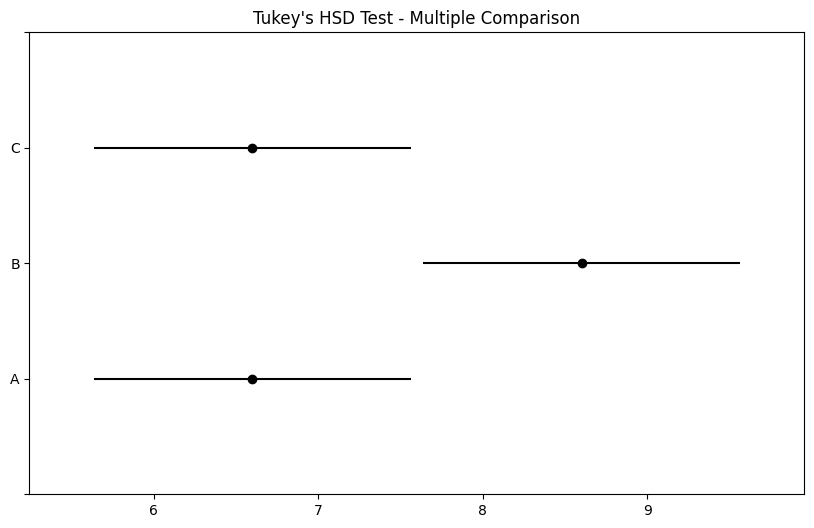

귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# 데이터를 하나의 DataFrame으로 합치기
"""
코드작성
"""
# ANOVA 결과

print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# 사후검정 (Tukey's HSD)

tukey_res = pairwise_tukeyhsd(endog = data['혈압감소량'], groups = data['그룹'])

# 결과 출력
print(tukey_res)

# 시각화
tukey_res.plot_simultaneous()
plt.title("Tukey's HSD Test - Multiple Comparison")
plt.show()

# 결론 도출 (사후검정 결과를 참고하여 해석)
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.")
else:
    print("귀무가설 채택: 신약 간에 혈압 감소 효과에 차이가 없다.")

- A와 B약물간의 차이가 있음
- B와 C약물간의 차이가 있음

결과적으로 B의 약물이 더 고혈압 효능에 좋다는 것을 입증

### Q4) 2-3 ANOVA: 페이지 A,B,C간 체류율 비교
- boxplot 그래프 그리기

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175


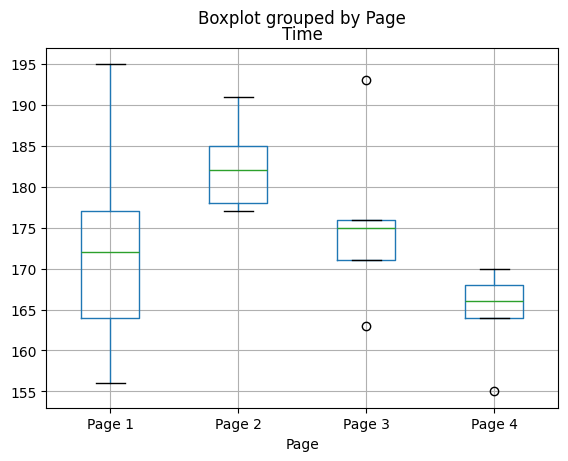

In [ ]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/four_sessions.csv"
four_sessions = pd.read_csv(url)
"""
코드작성
"""

In [ ]:
"""
코드작성
"""
print(f'F-Statistic: {res.statistic / 2:.3f}')
print(f'p-value: {res.pvalue / 2:.3f}')

F-Statistic: 1.370
p-value: 0.039


### Q5) 2-4 사후검정: 페이지 A,B,C간 체류율 비교
- 최소 1개의 페이지가 다른 것을 알았다. 그럼 어떤 페이지가 차이가 날까?
- 사후검정을 시행하고 결과를 작성해보세요

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Page 1 Page 2      9.8 0.4379  -8.3984 27.9984  False
Page 1 Page 3      2.8 0.9706 -15.3984 20.9984  False
Page 1 Page 4     -8.2 0.5825 -26.3984  9.9984  False
Page 2 Page 3     -7.0 0.6943 -25.1984 11.1984  False
Page 2 Page 4    -18.0 0.0531 -36.1984  0.1984  False
Page 3 Page 4    -11.0 0.3416 -29.1984  7.1984  False
-----------------------------------------------------


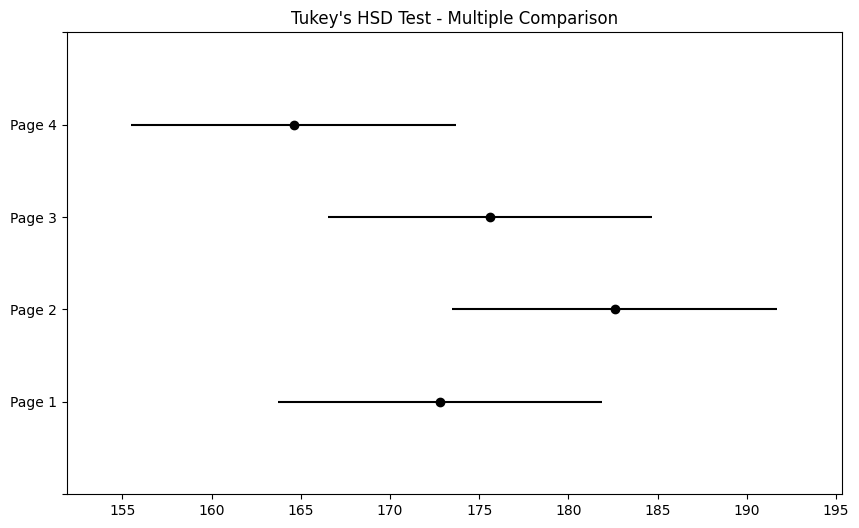

In [ ]:
# 사후 검정 (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

"""
코드작성
"""
print(tukey)
# 시각화 (Optional)

tukey.plot_simultaneous()
plt.title("Tukey's HSD Test - Multiple Comparison")
plt.show()

- 결과해석
     - ANOVA 통계량 : 그룹간 분산 SSBetween/그룹내 분산 SSWithin
     - 그룹 간 분산: 전체 데이터의 평균 vs 각 그룹의 평균을 지표화
     - 그룹 내 분산: 그룹 내 데이터 vs 각 그룹의 평균을 지표화
     - 분자가 클수록, 분모가 작을수록 / 다시말해서 그룹평균이 전체 데이터 평균와 멀수록, 그룹 내 데이터가 모여있는 정도가 작을수록 ANOVA 통계량은 커지고, 귀무가설(모든 그룹의 평균이 같다) 라는 가설이 기각될 확률이 높아져요.
     

     - tukey 사후검정: 각 그룹마다의 경우의 수를 따져가며(ex 1 vs 2, 1 vs 3) 마다의 그룹간 비교를 하기 때문에, 모두귀무가설이 채택될수있음.
  

In [ ]:
res = stats.tukey_hsd(four_sessions[four_sessions.Page == 'Page 1'].Time,
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -9.800     0.438   -27.998     8.398
 (0 - 2)     -2.800     0.971   -20.998    15.398
 (0 - 3)      8.200     0.582    -9.998    26.398
 (1 - 0)      9.800     0.438    -8.398    27.998
 (1 - 2)      7.000     0.694   -11.198    25.198
 (1 - 3)     18.000     0.053    -0.198    36.198
 (2 - 0)      2.800     0.971   -15.398    20.998
 (2 - 1)     -7.000     0.694   -25.198    11.198
 (2 - 3)     11.000     0.342    -7.198    29.198
 (3 - 0)     -8.200     0.582   -26.398     9.998
 (3 - 1)    -18.000     0.053   -36.198     0.198
 (3 - 2)    -11.000     0.342   -29.198     7.198



## 연습문제

### Q6) 신뢰구간 구하기
- 12건의 광고시간을 측정했다. 평균 15.5초, 분산 3.2초 일 때 모평균의 90% 신뢰구간을 구하시오.(ADP 32회 기출)

### Q7) 가설검정문제
- 목초에 따른 우유의 생산량을 알아보기 위하여 25마리 젖소를 대상으로 3주동안 임의로 추출된 12마리 젖소에게 건조시킨 목초를 주고 13마리 젖소에게는 들판에서 말린 목초를 주었다.
- 두 종류의 모 표준편차는 같다고 가정(**등분산 가정 만족**)하고 또한 우유생산량의 자료는 정규분포를 따른다고 가정(**정규성 가정 만족**)한다.
- 자연적으로 말린 목초의 사육하는 젖소의 우유생산량이 인공적으로 말린 목초로 사용하는 젖소보다 많다고 할 수 있는지 유의수준 0.05 에서 검정하세요.(단측 검정)

In [ ]:
import numpy as np
from scipy import stats

# 데이터 입력
nature = [44, 44, 56, 46, 47, 38, 58, 53, 49, 35, 46, 30, 31]  # 자연적으로 말린 목초
artificial = [35, 47, 55, 29, 40, 39, 32, 41, 42, 57, 51, 39]       # 인공적으로 말린 목초

### Q8) 카이제곱 검정
- 연령대에 따라 먹는 아이스크림의 차이가 있는지 유의수준 5% 내 독립성 검정

In [ ]:
import pandas as pd
df = pd.DataFrame({
    '아이스크림':['딸기', '초코', '바닐라', '딸기', '초코', '바닐라'],
    '연령':['10대', '10대', '10대', '20대', '20대', '20대'],
    '인원' : [200, 190, 250, 220, 250, 300]
})
df

### Q9) 분산분석
- 다음 3개의 반에 대한 수학점수이다. 3개의 반에 대한 수학 학업 성취도가 다른지 확인해보자

## 3. 선형회귀모델 만들기(with statsmodel)

In [ ]:
import statsmodels.api as sm
import pandas as pd

"""
코드작성
"""

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           4.75e-14
Time:                        14:30:33   Log-Likelihood:                 4.7103
No. Observations:                  10   AIC:                            -5.421
Df Residuals:                       8   BIC:                            -4.815
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.115      0.231      0.823      -0.239       0.293
X              2.0697      0.019    111.296      0.000       2.027       2.113
==============================================================================
Omnibus:                        0.708   Durbin-Watson:                   2.595
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.646
Skew:                          -0.412   Prob(JB):                        0.724
Kurtosis:                       2.067   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 연기노출(Exposure)에 대한 폐활량(PEFR)수치를 나타낸 것

In [ ]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv"
# CSV 파일 불러오기
lung = pd.read_csv(url)
# 데이터 확인
lung.head(3)

,PEFR,Exposure
0,390,0
1,410,0
2,430,0


In [ ]:
"""
코드작성
"""

#RMSE :  예측값 - 실제값을 차이를 계산해서 내 모델의 성능을 파악하는 과정

In [ ]:
model.intercept_

array([424.58280657])

In [ ]:
model.coef_[0]

array([-4.18457649])

-  PEFR =   424.58  - 4.18 * Exposure
- Expousre이  1단계 증가할때마다(연기 노출정도) 증가할때마다  폐활량 수치(PEFR)이 -4.18 감소한다.


In [ ]:
# prompt: lung 데이터를 가지고 statsmodel로 적합해주고 summary결과를 출력해줘

import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# GitHub raw file URL
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv"
# CSV 파일 불러오기
lung = pd.read_csv(url)

# 독립 변수 (Exposure)와 종속 변수 (PEFR) 설정
X = lung[['Exposure']]
y = lung['PEFR']

# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00201
Time:                        07:25:52   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.5828     20.796     20.417      0.0